# Logistic Regression for Adult Dataset

# Just for on attribute

In [104]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [105]:
# Load the Adult dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
adult = pd.read_csv(url, header=None, index_col=False, names=['age', 'workclass', 'fnlwgt', 'education', 
        'education-num', 'marital-status','occupation', 'relationship', 'race', 'sex', 
        'capital-gain', 'capital-loss','hours-per-week', 'native-country', 'income'])

# Convert categorical variables to numeric
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                       'relationship', 'race', 'sex','native-country', 'income']
for column in categorical_columns:
    adult[column] = adult[column].astype('category').cat.codes

In [106]:
class LogisticRegression:
    #learning rate usually is small, between 0 and 1
    #iterations for the gradient descent
    def __init__(self, alpha=0.001, N=1000):
        self.alpha = alpha
        self.N = N
        self.weights = None
        self.intercept = None

    def fit(self, X, y):
        #X training samples, y training labels
        n_samples, n_features = X.shape
        #rows are samples, columns are attributes

        #init parameters
        self.weights = np.zeros(n_features) #we can use random numbers too
        self.intercept = 0

        #calculate gradient descent
        for _ in range(self.N): #_ because we dont need it later
            #approximate y with linear combination of weights and x, plus intercept
            linear_model = np.dot(X, self.weights) + self.intercept 
            #apply sigmoid function to the linear approx
            y_predicted = self._sigmoid(linear_model)

            #calculate the gradients, this update the weights in the logistic regression
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            #update the weights and intercept
            self.weights -= self.alpha * dw
            self.intercept -= self.alpha * db

    def predict(self, X):
        #X will be the test samples
        linear_model = np.dot(X, self.weights) + self.intercept
        y_predicted = self._sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [107]:
#choose an attribute
X1 = adult[['capital-gain']] #'education-num', 'capital-loss', 'age', 'hours-per-week', 'capital-gain' 
y = adult['income']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state=42)

In [108]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

regressor = LogisticRegression(alpha=0.0001, N=1000)
regressor.fit(X1_train, y1_train)
predictions = regressor.predict(X1_test)

print("Logistic Regression classification accuracy:", accuracy(y1_test, predictions))

Logistic Regression classification accuracy: 0.7823728119561879


# Hyperparameters

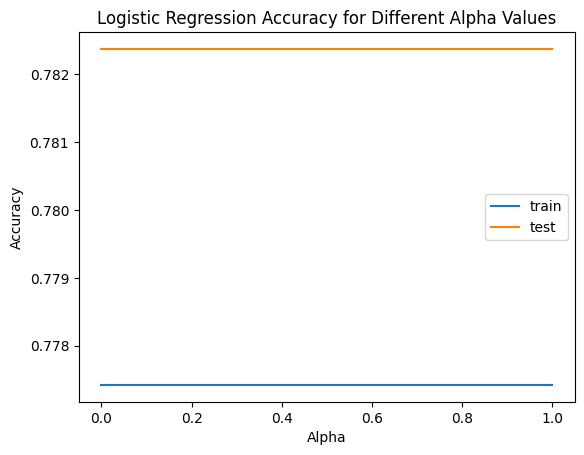

In [109]:
import matplotlib.pyplot as plt

# choose a range of alpha values to test
alpha_range = [0.0001, 0.001, 0.01, 0.1, 1]

# initialize lists to store accuracy scores
train_accuracy_scores = []
test_accuracy_scores = []

# iterate over alpha values and record accuracy scores
for alpha in alpha_range:
    # fit the model on the training data
    regressor = LogisticRegression(alpha=alpha, N=1000)
    regressor.fit(X1_train, y1_train)
    
    # make predictions on the training and test data
    train_predictions = regressor.predict(X1_train)
    test_predictions = regressor.predict(X1_test)
    
    # calculate the accuracy scores
    train_accuracy = accuracy(y1_train, train_predictions)
    test_accuracy = accuracy(y1_test, test_predictions)
    
    # record the accuracy scores
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)

# plot the accuracy scores for different alpha values
plt.plot(alpha_range, train_accuracy_scores, label="train")
plt.plot(alpha_range, test_accuracy_scores, label="test")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Logistic Regression Accuracy for Different Alpha Values")
plt.legend()
plt.show()

# For two attributes

In [110]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [111]:
#choose two attribute
X2 = adult[['capital-gain', 'education-num']] #'education-num', 'capital-loss', 'age', 'hours-per-week', 'capital-gain' 
y = adult['income']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=42)

In [112]:
model = LogisticRegression(random_state=42)

model.fit(X2_train, y2_train)

y_pred = model.predict(X2_test)

accuracy = accuracy_score(y2_test, y_pred)


print("Accuracy for logistic regression with two attributes:", accuracy)

Accuracy for logistic regression with two attributes: 0.8104207185996519
